In [1]:
import sys
sys.path.append('Scripts')
%load_ext autoreload
%autoreload 2

import torch
import torch.nn as nn
import torch.optim as optim
import torch.nn.functional as F
from torchvision import transforms, utils
from torch.utils.data import Dataset, DataLoader

import pandas as pd
import matplotlib.pyplot as plt
import numpy as np

from utils import path
from sklearn import preprocessing
import os
import gc

from mpl_toolkits.axes_grid1 import ImageGrid
from pyts.image import GramianAngularField

def read_data(dataframe):
    return pd.read_csv(dataframe['path'], names = range(1, 16+1), dtype = float)

Gramian Angular Field Script

In [3]:
data

,subject,state,path
0,_,1,C:\Users\Patrick\Documents\GitHub\ICDeepLearni...
1,_,1,C:\Users\Patrick\Documents\GitHub\ICDeepLearni...
2,_,1,C:\Users\Patrick\Documents\GitHub\ICDeepLearni...
3,_,1,C:\Users\Patrick\Documents\GitHub\ICDeepLearni...
4,_,1,C:\Users\Patrick\Documents\GitHub\ICDeepLearni...
...,...,...,...
2338,_,5,C:\Users\Patrick\Documents\GitHub\ICDeepLearni...
2339,_,5,C:\Users\Patrick\Documents\GitHub\ICDeepLearni...
2340,_,5,C:\Users\Patrick\Documents\GitHub\ICDeepLearni...
2341,_,5,C:\Users\Patrick\Documents\GitHub\ICDeepLearni...


Part 1 started.
Error creating picture: C:\Users\Patrick\Documents\GitHub\ICDeepLearning\Data\GAF_FullDataset\512\1\__0.png
Error creating picture: C:\Users\Patrick\Documents\GitHub\ICDeepLearning\Data\GAF_FullDataset\512\1\__1.png
Error creating picture: C:\Users\Patrick\Documents\GitHub\ICDeepLearning\Data\GAF_FullDataset\512\1\__2.png
Error creating picture: C:\Users\Patrick\Documents\GitHub\ICDeepLearning\Data\GAF_FullDataset\512\1\__3.png
Error creating picture: C:\Users\Patrick\Documents\GitHub\ICDeepLearning\Data\GAF_FullDataset\512\1\__4.png
Error creating picture: C:\Users\Patrick\Documents\GitHub\ICDeepLearning\Data\GAF_FullDataset\512\1\__5.png
Error creating picture: C:\Users\Patrick\Documents\GitHub\ICDeepLearning\Data\GAF_FullDataset\512\1\__6.png
Error creating picture: C:\Users\Patrick\Documents\GitHub\ICDeepLearning\Data\GAF_FullDataset\512\1\__7.png
Error creating picture: C:\Users\Patrick\Documents\GitHub\ICDeepLearning\Data\GAF_FullDataset\512\1\__8.png
Error creati

ERROR:root:Internal Python error in the inspect module.
Below is the traceback from this internal error.



Error creating picture: C:\Users\Patrick\Documents\GitHub\ICDeepLearning\Data\GAF_FullDataset\512\1\__19.png
Traceback (most recent call last):
  File "C:\Users\Patrick\Anaconda3\lib\site-packages\IPython\core\interactiveshell.py", line 3331, in run_code
    exec(code_obj, self.user_global_ns, self.user_ns)
  File "<ipython-input-2-a8420812f42e>", line 20, in <module>
    sample = np.loadtxt(data.loc[i]['path']).reshape(1, -1)
  File "C:\Users\Patrick\Anaconda3\lib\site-packages\numpy\lib\npyio.py", line 981, in loadtxt
    fh = np.lib._datasource.open(fname, 'rt', encoding=encoding)
  File "C:\Users\Patrick\Anaconda3\lib\site-packages\numpy\lib\_datasource.py", line 269, in open
    return ds.open(path, mode, encoding=encoding, newline=newline)
  File "C:\Users\Patrick\Anaconda3\lib\site-packages\numpy\lib\_datasource.py", line 621, in open
    encoding=encoding, newline=newline)
  File "C:\Users\Patrick\Anaconda3\lib\_bootlocale.py", line 11, in getpreferredencoding
    def getprefer

KeyboardInterrupt: 

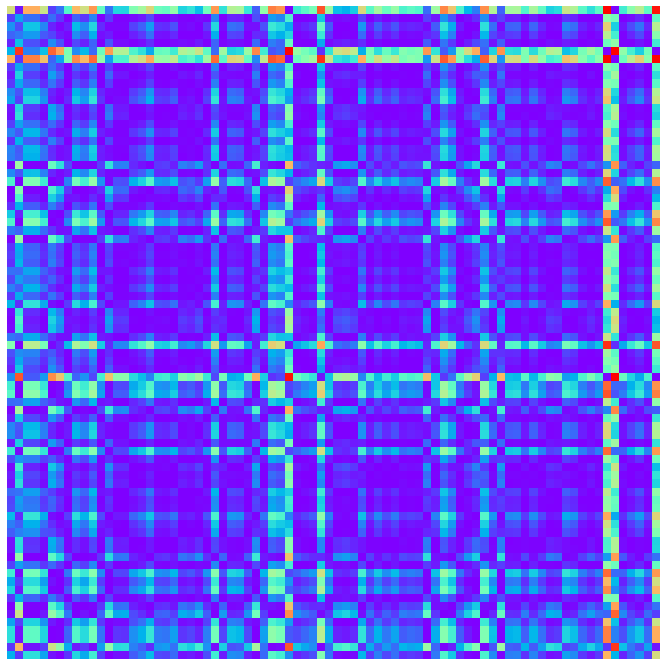

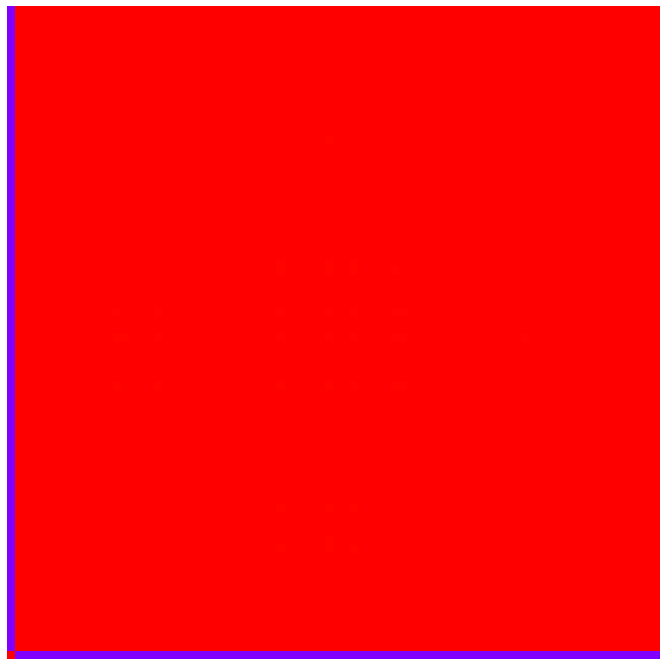

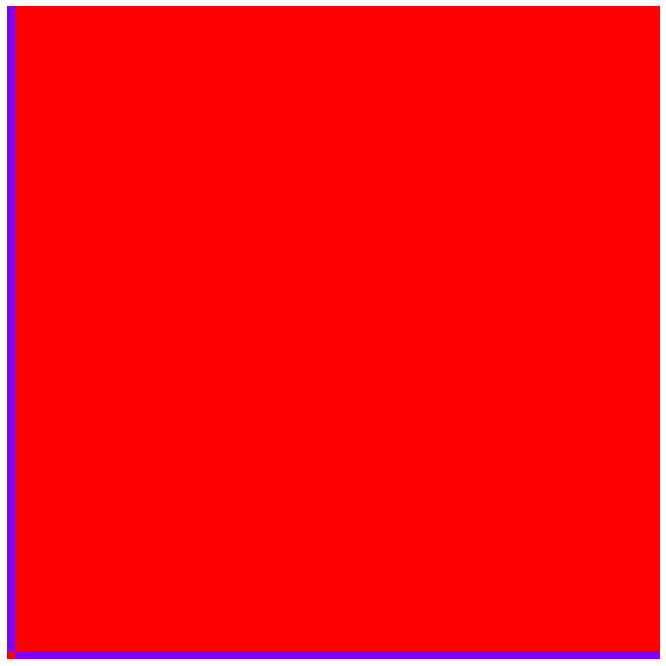

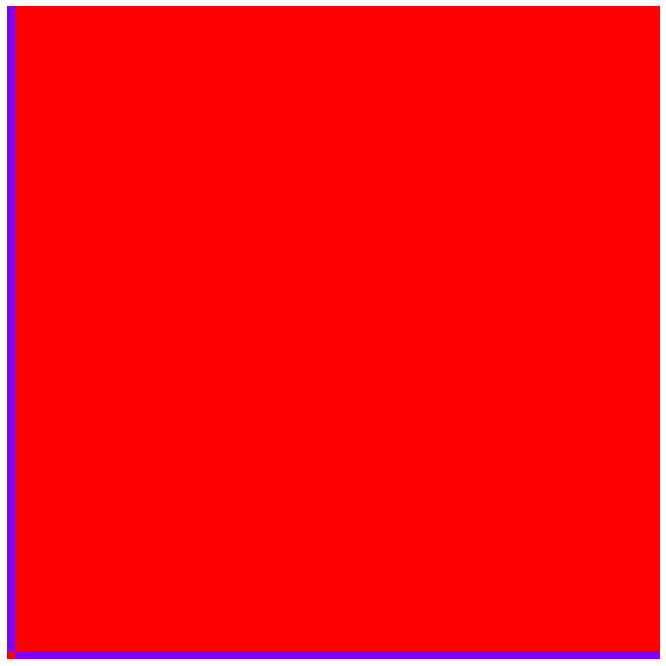

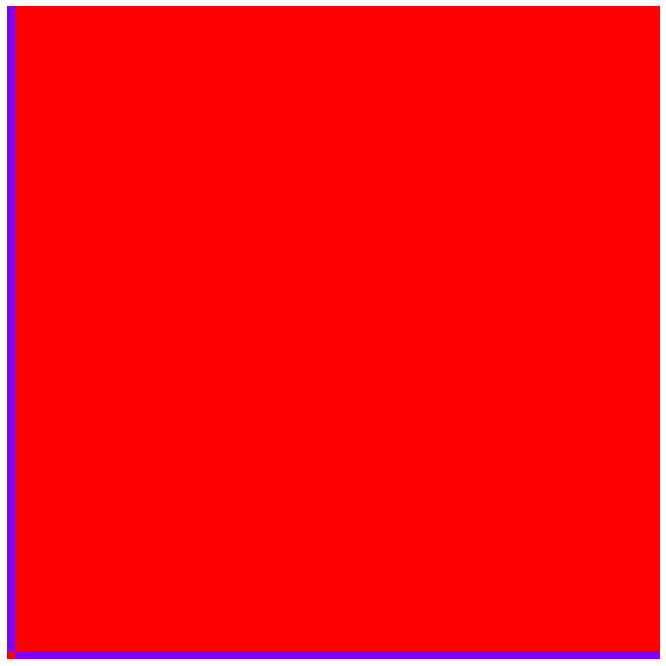

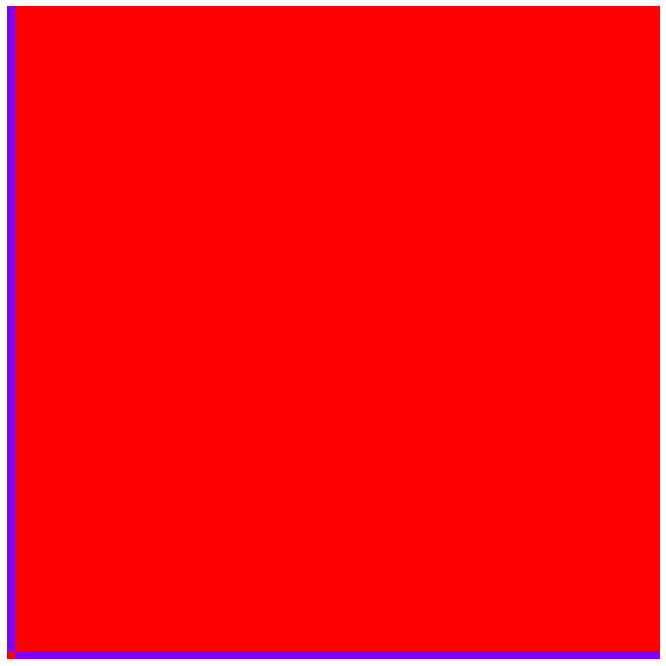

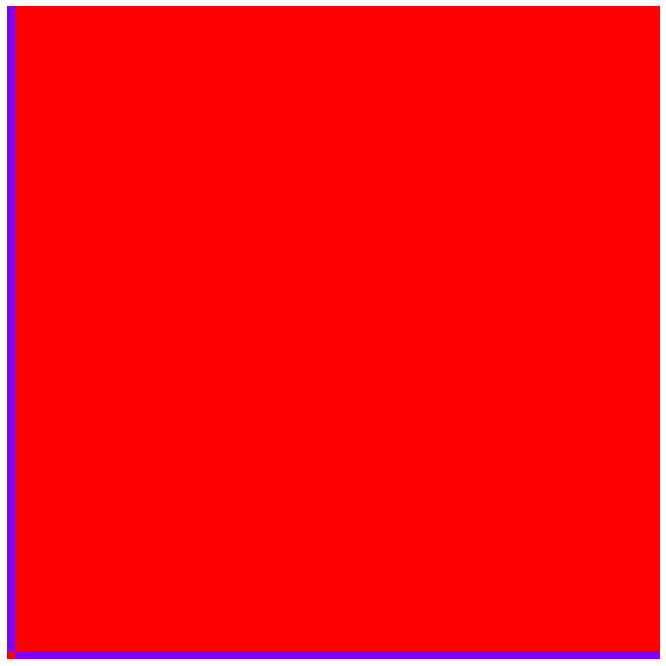

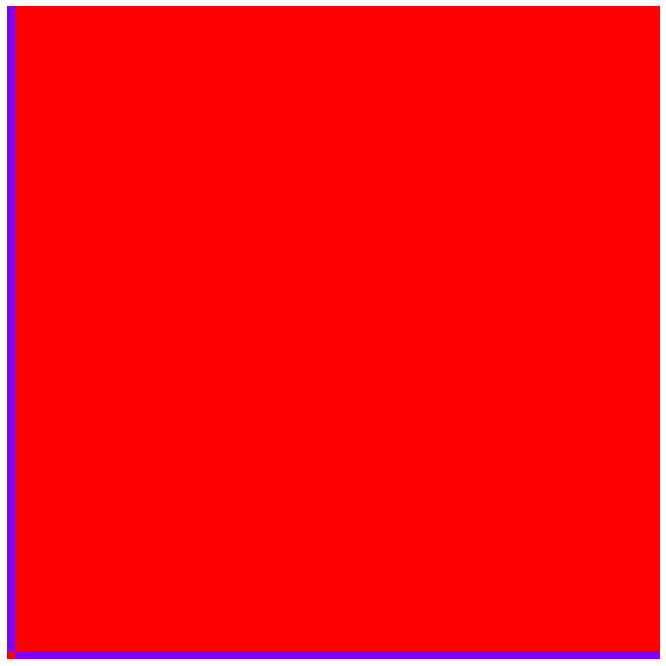

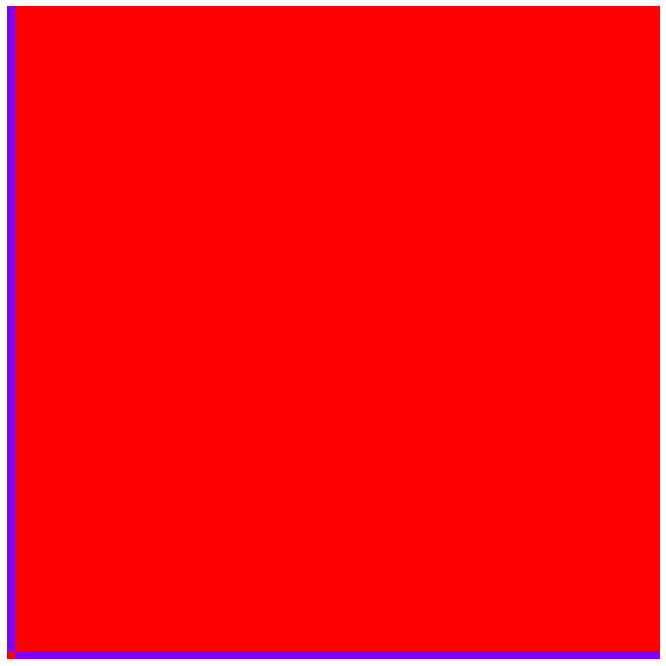

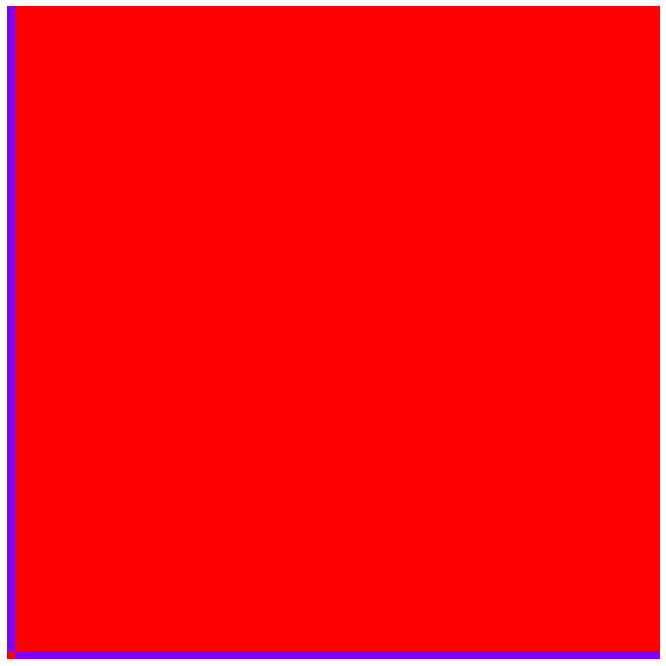

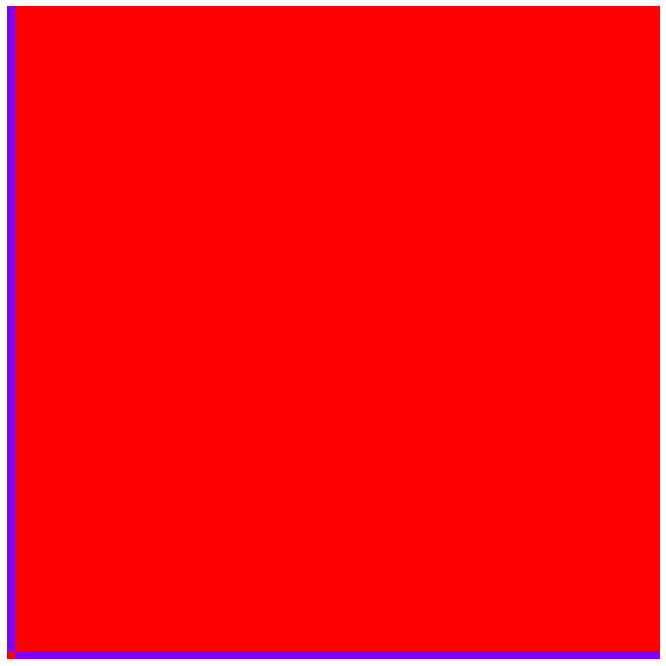

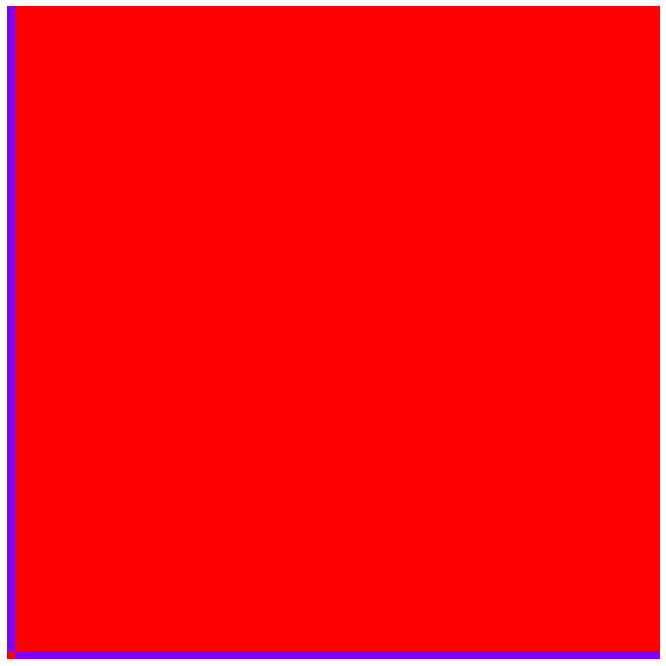

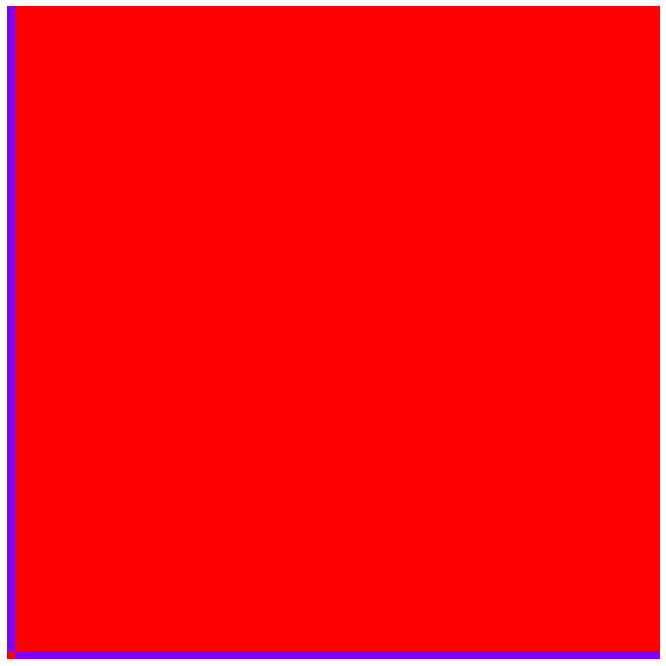

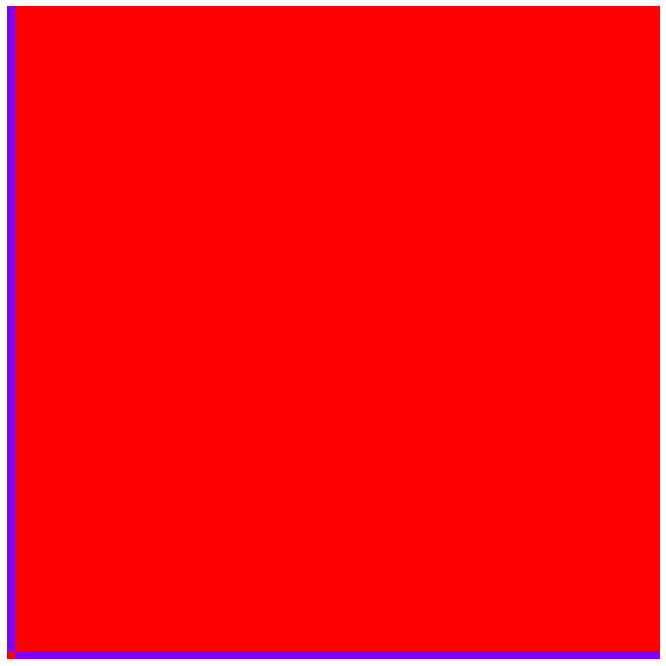

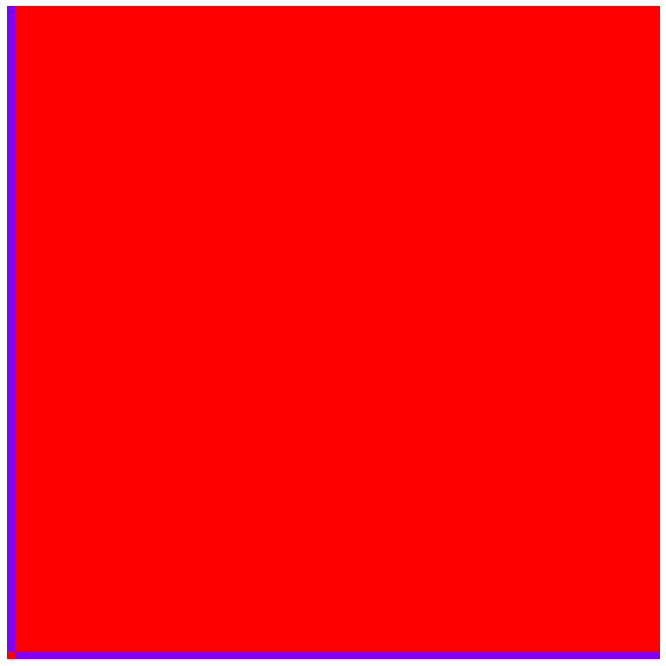

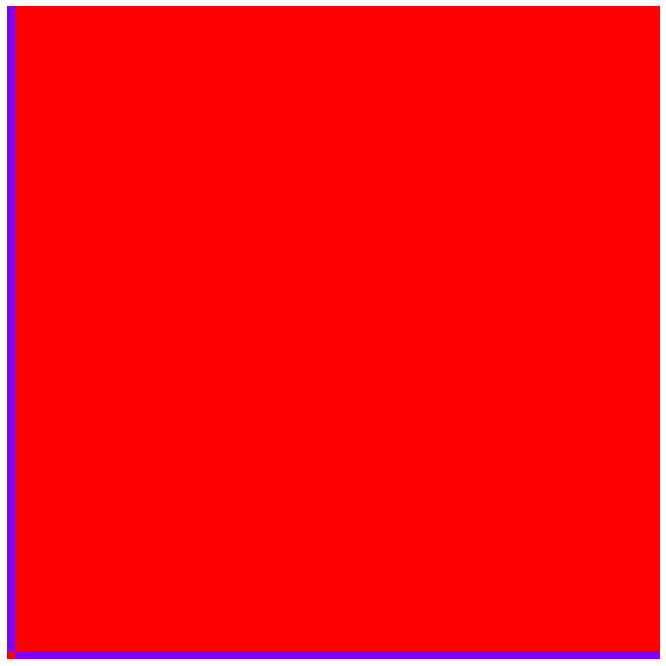

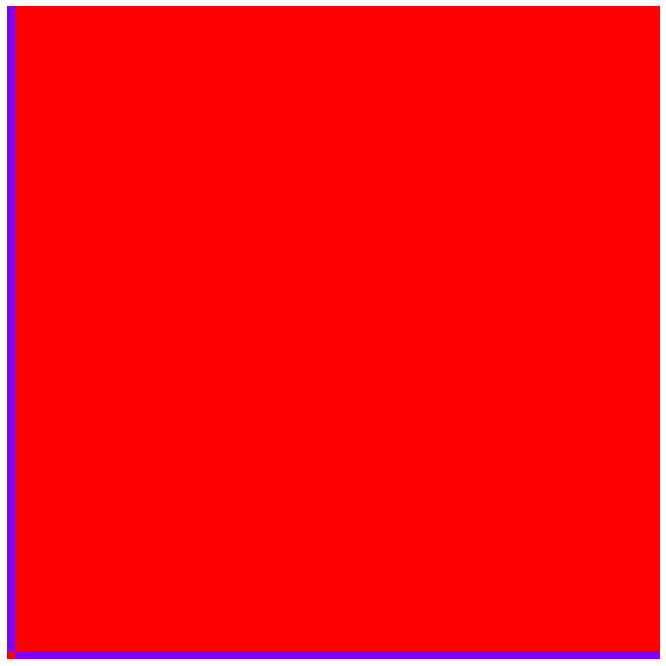

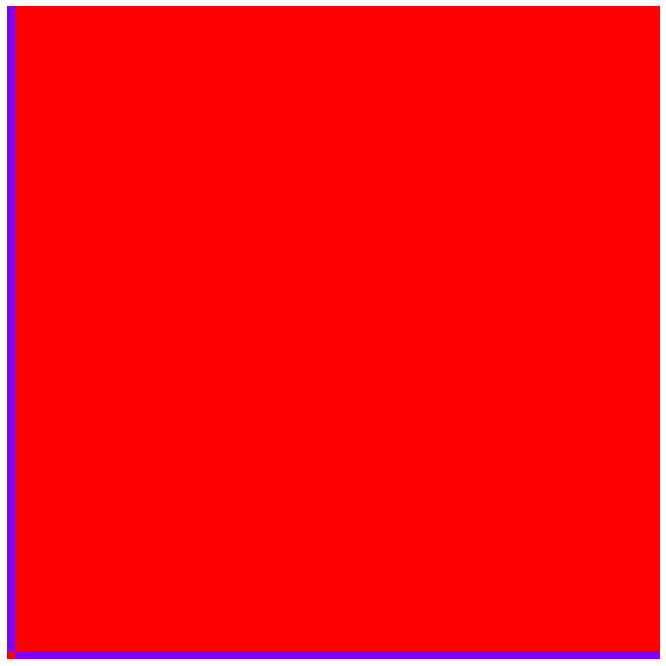

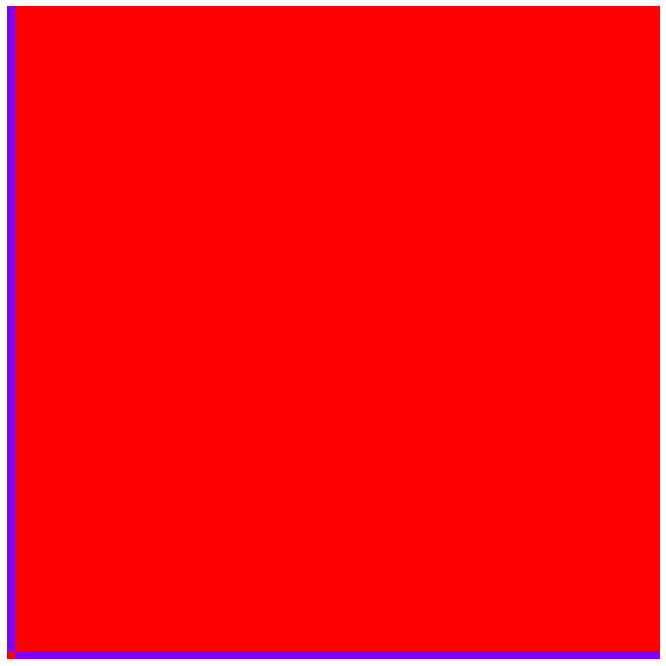

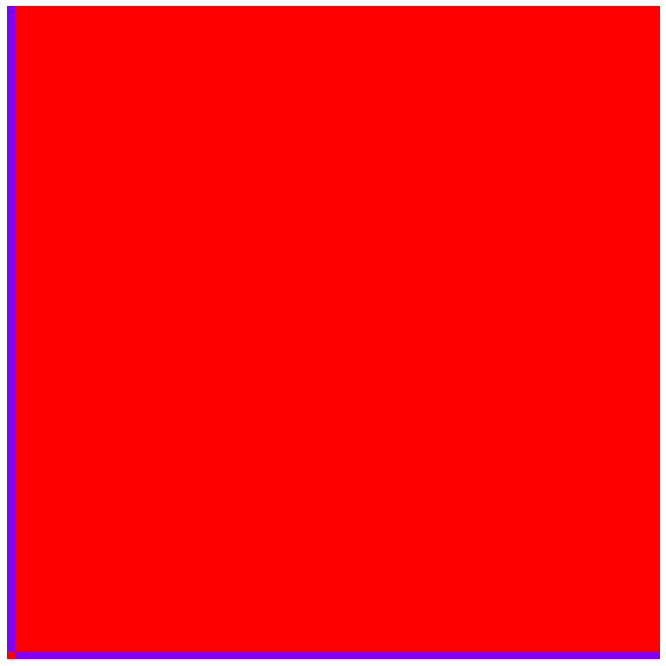

In [2]:
dataType = '512'
method = 'Full'
methodDict = {
    'Simple': ['Dados_BCI_Combinados', 'GAF_Combinados', 'Combined_'],
    'PCA': ['Dados_BCI_CombinadosPCA', 'GAF_PCA', 'PCA_'],
    'Full': ['Dados_BCI_FullDataset', 'GAF_FullDataset', 'FullDataset_']
}
dataPath = path('C:\\Users\Patrick\\Documents\\GitHub\\ICDeepLearning\\Data\\'+methodDict[method][0]+'\\'+dataType)
figPath = path('C:\\Users\\Patrick\\Documents\\GitHub\\ICDeepLearning\\Data\\'+methodDict[method][1]+"\\"+dataType)

data = pd.read_csv('SSVEPDataset'+methodDict[method][2]+dataType+".csv")

gasf = GramianAngularField(image_size = 80, method = 'summation')
files = list(range(len(data)))
n = len(files)
newlist = list(range(0, len(data), n//5))
for k in range(1, len(newlist)):
    print("Part {} started.".format(k))
    for i in range(newlist[k-1], newlist[k]):
        sample = np.loadtxt(data.loc[i]['path']).reshape(1, -1)
        if sample[0][1] != 0:
            X = gasf.fit_transform(sample)
            fig, ax = plt.subplots(nrows = 1, ncols = 1, figsize = (12, 12))
            plt.axis('off')
            im = ax.imshow(X[0], cmap = 'rainbow', origin = 'lower')

            state = str(data.loc[i]['state'])
            subject = str(data.loc[i]['subject'])
            if data.loc[i]['path'][-6] == '\\':
                file = data.loc[i]['path'][-5]
            else:
                file = data.loc[i]['path'][-6:-4]

            try:
                fig.savefig(figPath()+'\\'+state+'\\'+subject+'_'+file+".png", dpi = 200, bbox_inches = 'tight')
                plt.close()
            except:
                print("Error creating picture: {}".format(figPath()+'\\'+state+'\\'+subject+'_'+file+".png"))
    print("Part {} finished.".format(k))

***

Example

In [21]:
sample = np.loadtxt(data.loc[15]['path']).reshape(1, -1)
sample

array([[ 1.500000e+01, -1.556282e-05,  2.168299e-06, ...,  2.837532e-05,
        -1.400599e-05,  1.343923e-05]])

In [22]:
gasf = GramianAngularField(image_size = 80, method = 'summation')
X_gasf = gasf.fit_transform(sample)

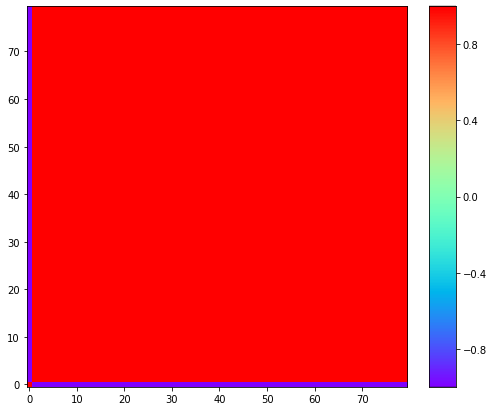

In [23]:
fig = plt.figure(figsize = (12, 7))
grid = ImageGrid(fig, 111,
                 nrows_ncols=(1, 1),
                 axes_pad=0.15,
                 share_all=True,
                 cbar_location="right",
                 cbar_mode="single",
                 cbar_size="7%",
                 cbar_pad=0.3,
                 )

for ax in grid:
    im = ax.imshow(X_gasf[0], cmap = 'rainbow', origin = 'lower')

ax.cax.colorbar(im)
ax.cax.toggle_label(True)
plt.show()